Regular expressions

Task 1 + 2

In [1]:

import regex as reg
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def find_amendments(path) -> list:
    """Function computes the number of additions, removals and changes of a unit in the folder,
    which path is provided as an argument"""

    unit_addition_counter = 0
    unit_removal_counter = 0
    unit_change_counter = 0

    # Iterating over files in the directory
    for filename in os.listdir(path):

        f = os.path.join(path, filename)

        if os.path.isfile(f):
            with open(f, encoding='utf-8') as file:
                file = file.read()

                unit_addition_counter += len(reg.findall(r"\bdodaje\ssię\s(art.|pkt|ust.|lit.)\b", file, reg.IGNORECASE))
                unit_removal_counter += len(reg.findall(r"\b(art.|pkt|ust.|lit.)\s(\d+)\s(skreśla|uchyla)\ssię\b", file, reg.IGNORECASE))
                unit_change_counter += len(reg.findall(r"\b(art.|pkt|ust.|lit.)\s(\d+)\sotrzymuje\sbrzmienie\b", file, reg.IGNORECASE))
    return [
                unit_addition_counter,
                unit_removal_counter,
                unit_change_counter
            ]

ammendments_list = find_amendments('./ustawy')
ammendments_list

[1279, 1281, 7728]

Task 3

In [3]:
# We need to extract years of the bills
def get_year_from_text(path, filename) -> str:
    """Function finds year of the filename (bill) in the a path directory"""
    
    f = os.path.join(path, filename)
    if os.path.isfile(f):
        with open(f, encoding='utf-8') as file:
            file = file.read()
            pattern = reg.compile(r"(?<=z\s+dnia\s+\d+\s+\w+\s+)\d+", reg.IGNORECASE)
            result = pattern.findall(file)

            if len(result) > 0:
                return result[0]

In [4]:
from collections import defaultdict

def find_amendments_by_year(path) -> list:
    """Creation of mapping from a year of a bill to a unique name of the bill"""
    
    result_addition_unit = defaultdict(lambda: 0)
    result_removal_unit = defaultdict(lambda: 0)
    result_change_unit = defaultdict(lambda:0)

    # Iterating over files in the directory
    for filename in os.listdir(path):
        year = get_year_from_text(path, filename)

        if year is None:
            continue

        f = os.path.join(path, filename)

        if os.path.isfile(f):
            with open(f, encoding='utf-8') as file:
                file = file.read()
                
                result_addition_unit[year] += len(reg.findall(r"\bdodaje\ssię\s(art.|pkt|ust.|lit.)\b", file, reg.IGNORECASE))
                result_removal_unit[year] += len(reg.findall(r"\b(art.|pkt|ust.|lit.)\s(\d+)\s(skreśla|uchyla)\ssię\b", file, reg.IGNORECASE))
                result_change_unit[year] += len(reg.findall(r"\b(art.|pkt|ust.|lit.)\s(\d+)\sotrzymuje\sbrzmienie\b", file, reg.IGNORECASE))

    # We have to sort dictionaries by keys
    result_addition_unit = dict(sorted(result_addition_unit.items(), key=lambda item: item))
    result_removal_unit = dict(sorted(result_removal_unit.items(), key=lambda item: item))
    result_change_unit = dict(sorted(result_change_unit.items(), key=lambda item: item))


    return [
                result_addition_unit,
                result_removal_unit,
                result_change_unit
            ]
ammendments_list_by_year = find_amendments_by_year("./ustawy/")
ammendments_list_by_year

[{'1993': 9,
  '1994': 17,
  '1995': 59,
  '1996': 45,
  '1997': 71,
  '1998': 80,
  '1999': 47,
  '2000': 159,
  '2001': 228,
  '2002': 5,
  '2003': 51,
  '2004': 63,
  '2006': 17,
  '2007': 79,
  '2008': 16,
  '2009': 16,
  '2010': 11,
  '2011': 10,
  '2012': 10,
  '2013': 51,
  '2014': 32,
  '2015': 34,
  '2016': 15,
  '2017': 78,
  '2018': 76},
 {'1993': 15,
  '1994': 19,
  '1995': 71,
  '1996': 85,
  '1997': 116,
  '1998': 185,
  '1999': 50,
  '2000': 296,
  '2001': 255,
  '2002': 5,
  '2003': 43,
  '2004': 14,
  '2006': 11,
  '2007': 15,
  '2008': 10,
  '2009': 6,
  '2010': 8,
  '2011': 8,
  '2012': 11,
  '2013': 4,
  '2014': 8,
  '2015': 6,
  '2016': 3,
  '2017': 19,
  '2018': 18},
 {'1993': 55,
  '1994': 70,
  '1995': 318,
  '1996': 398,
  '1997': 610,
  '1998': 762,
  '1999': 184,
  '2000': 1262,
  '2001': 1255,
  '2002': 28,
  '2003': 472,
  '2004': 359,
  '2006': 105,
  '2007': 438,
  '2008': 69,
  '2009': 153,
  '2010': 109,
  '2011': 65,
  '2012': 32,
  '2013': 148,
  '201

C:\Users\patry\AppData\Local\Temp\ipykernel_4628\1836953265.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '1993'),
  Text(1, 0, '1994'),
  Text(2, 0, '1995'),
  Text(3, 0, '1996'),
  Text(4, 0, '1997'),
  Text(5, 0, '1998'),
  Text(6, 0, '1999'),
  Text(7, 0, '2000'),
  Text(8, 0, '2001'),
  Text(9, 0, '2002'),
  Text(10, 0, '2003'),
  Text(11, 0, '2004'),
  Text(12, 0, '2006'),
  Text(13, 0, '2007'),
  Text(14, 0, '2008'),
  Text(15, 0, '2009'),
  Text(16, 0, '2010'),
  Text(17, 0, '2011'),
  Text(18, 0, '2012'),
  Text(19, 0, '2013'),
  Text(20, 0, '2014'),
  Text(21, 0, '2015'),
  Text(22, 0, '2016'),
  Text(23, 0, '2017'),
  Text(24, 0, '2018')])

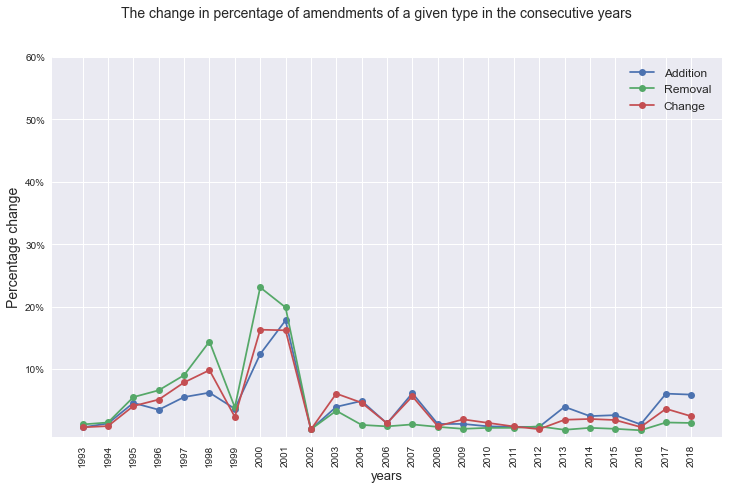

In [10]:
years = ammendments_list_by_year[0].keys()
percentage_addition = np.array(list(ammendments_list_by_year[0].values())) / ammendments_list[0] * 100
percentage_removal = np.array(list(ammendments_list_by_year[1].values())) / ammendments_list[1] * 100
percentage_change = np.array(list(ammendments_list_by_year[2].values())) / ammendments_list[2] * 100

fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(7)
plt.style.use('seaborn')
plt.plot(years,percentage_addition, label = 'Addition', marker ='o')
plt.plot(years,percentage_removal, label = 'Removal', marker='o')
plt.plot(years,percentage_change, label = 'Change', marker = 'o')
plt.yticks([10,20,30,40,50,60], ['10%', '20%', '30%', '40%', '50%', '60%'])
plt.suptitle('The change in percentage of amendments of a given type in the consecutive years', fontsize=14)
plt.xlabel('years', fontsize = 13)
plt.ylabel('Percentage', fontsize = 14)
plt.legend(fontsize=12)
plt.xticks(rotation=90)

Task 4

In [12]:
def calculate_ustawa_occurrences(path) -> int:
    
    word_counter = 0
    temp = "(ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)"
    
    for filename in os.listdir(path):

        f = os.path.join(path, filename)

        if os.path.isfile(f):
            with open(f, encoding='utf-8') as file:
                file = file.read()
                pattern = reg.compile(r"\b{}\b".format(temp), reg.IGNORECASE)
                word_counter += len(pattern.findall(file))
    return word_counter

result_4 = calculate_ustawa_occurrences("./ustawy")
result_4

24934

Task 5

In [13]:
def calculate_word_occurrences_followed_by_z_dnia(path) -> int:

    word_counter = 0
    temp = "(ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)"

    for filename in os.listdir(path):

        f = os.path.join(path, filename)

        if os.path.isfile(f):
            with open(f, encoding='utf-8') as file:
                file = file.read()
                pattern = reg.compile(r"\b{}\b(?=\sz\sdnia)".format(temp), reg.IGNORECASE)
                word_counter += len(pattern.findall(file))
    return word_counter

result_5 = calculate_word_occurrences_followed_by_z_dnia("./ustawy")
result_5

7516

Task 6

In [14]:
def calculate_word_occurrences_not_followed_by_z_dnia(path) -> int:

    # result = dict()
    word_counter = 0
    temp = "(ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)"

    for filename in os.listdir(path):

        f = os.path.join(path, filename)
        
        if os.path.isfile(f):
            with open(f, encoding='utf-8') as file:
                file = file.read()
                pattern = reg.compile(r"\b(?<!\d){}(?!\sz\sdnia)\b".format(temp), reg.IGNORECASE)
                word_counter += len(pattern.findall(file))
    return word_counter

result_6 = calculate_word_occurrences_not_followed_by_z_dnia("./ustawy")
result_6

17418

In [15]:
# Is the result correct?
ustawa_inflectional_form_list = [
    "ustawa",
    "ustawy",
    "ustawie",
    "ustawę",
    "ustawą",
    "ustawie",
    "ustawo",
    "ustaw",
    "ustawom",
    "ustawami",
    "ustawach"
]

def is_result_correct(inflectional_form_list, result_4=result_4, result_5=result_5, result_6=result_6) -> bool:
    """Function checks wheter the result of task 4 is equal to the sum of the results of tasks 5 and 6"""

    if result_4 == result_5 + result_6:
        return True
    else:
        return False
    
is_result_correct(ustawa_inflectional_form_list)

True

Task 7

In [16]:
def calculate_ustawa_occurrences_and_exclude_o_zmianie_expression(path) -> int:

    word_counter = 0

    for filename in os.listdir(path):
        f = os.path.join(path, filename)
        temp_ustawa = "(ustawa|ustawy|ustawie|ustawę|ustawą|ustawie|ustawo|ustaw|ustawom|ustawami|ustawach)"
        temp_zmiana = "(zmiana|zmiany|zmianie|zmianę|zmianą|zmianie|zmiano|zmian|zmianom|zmianami|zmianach)"

        if os.path.isfile(f):
            with open(f, encoding='utf-8') as file:
                file = file.read()
                pattern = reg.compile(r"(?<!o\s{}\s)\b{}\b".format(temp_zmiana, temp_ustawa), reg.IGNORECASE)
                word_counter += len(pattern.findall(file))
    return word_counter

result_7 = calculate_ustawa_occurrences_and_exclude_o_zmianie_expression("./ustawy")
result_7

24082

Task 8

C:\Users\patry\AppData\Local\Temp\ipykernel_4628\3958517431.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<BarContainer object of 4 artists>

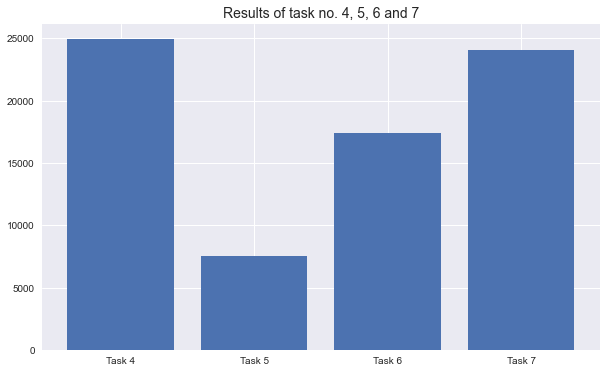

In [20]:
# Barplot
x_task_8 = np.array(["Task 4", "Task 5", "Task 6", "Task 7"])
y_task_8 = np.array([result_4, result_5, result_6, result_7])

plt.style.use('seaborn')
plt.figure(figsize=(10,6))
plt.title("Results of task no. 4, 5, 6 and 7", fontsize = 14)
plt.bar(x_task_8, y_task_8)